<a href="https://colab.research.google.com/github/Jarin31/Data-Science-Project-1/blob/main/Data_Science_Project_I_Zhahrina_ND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Project/Mobile_phone_price.csv')
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [ ]:
df.shape #atribut tidak menggunakan tanda kurung --- ini bukan fungsi

(407, 8)

In [ ]:
df.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


In [ ]:
df.info() #fungsi = melakukan sesuatu

#output nya untuk scanning yang null, untuk melihat seberapa rapih dataset yang akan dipakai
#null = data yg bervalue NAN
#string kosong tidak termasuk null


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [ ]:
# membuat value berisi none atau ""
df_cp = df.copy()
df_cp.loc[0, 'Model'] = None
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   406 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


DATA CLEANING

In [ ]:
#cek spasi atau nama kolom supaya tidak typo
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [ ]:
df.describe() #tampilkan statisktik hanya yg numerik saja

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


Analisis kolom **Storage**

In [ ]:
df['Storage '].unique()

array(['128 GB', '256 GB', '64 GB', '32 GB', '128GB', '256GB', '64GB',
       '32GB', '256', '64', '128', '512', '32'], dtype=object)

In [ ]:
#contoh sederhana replace *hanya untuk tipe string
s = '128 GB'
s = s.replace(' ', '')
s = s.replace('GB', '')
s

'128'

In [ ]:
df['Storage '] = df['Storage '].str.replace(' ', '')
df['Storage '] = df['Storage '].str.replace('GB', '')
df['Storage '] = df['Storage '].astype(int)
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [ ]:
df['Storage '].unique()

array([128, 256,  64,  32, 512])

In [ ]:
#mencoba menambahkan string kata 'GB'
s = 128
str(s) + ' GB'

'128 GB'

Analaisis Kolom **RAM**

In [ ]:
df['RAM '].unique()

array(['6 GB', '12 GB', '8 GB', '4 GB', '3 GB', '2 GB', '4GB', '8GB',
       '6GB', '12GB', '3GB', '2GB', '5GB', '12', '3', '6', '8', '4', '16',
       '2'], dtype=object)

In [ ]:
df['RAM '] = df['RAM '].str.replace(' ', '')
df['RAM '] = df['RAM '].str.replace('GB', '')
df['RAM '] = df['RAM '].astype(int)
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128,8,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128,8,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [ ]:
df['RAM '].unique()

array([ 6, 12,  8,  4,  3,  2,  5, 16])

In [ ]:
df.describe()

,Storage,RAM,Battery Capacity (mAh)
count,407.000000,407.000000,407.000000
mean,123.046683,5.837838,4676.476658
std,64.963160,2.431980,797.193713
min,32.000000,2.000000,1821.000000
25%,64.000000,4.000000,4300.000000
50%,128.000000,6.000000,5000.000000
75%,128.000000,8.000000,5000.000000
max,512.000000,16.000000,7000.000000


Analisis Kolom **Screen Size**

In [ ]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [ ]:
df['Screen Size (inches)'].unique()

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.55', '6.78', '6.43', '6.5',
       '6.62', '5.4', '6.2', '6.51', '6.6', '4.7', '6.58', '6.52', '6.44',
       '6.53', '6.56', '6.8 + 3.9', '4.5', '6.39', '5.9', '5.5', '6.81',
       '5.99', '6.82', '6.3', '6.22', '6', '6.35', '6.9', '6.76', '6.49',
       '6.72', '5.7', '6.47', '7.6 (unfolded)', '6.15', '6.57'],
      dtype=object)

In [ ]:
df[df['Screen Size (inches)'] == '6.8 + 3.9' ] #2 screen


,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
88,LG,Wing,256,8,6.8 + 3.9,64MP + 13MP + 12MP,4000,$999


In [ ]:
df[df['Screen Size (inches)'] == '7.6 (unfolded)']

#kesimpulan : biarkan apa adanya

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
373,Samsung,Galaxy Z Fold2 5G,256,12,7.6 (unfolded),12+12+12,4500,1999


Analisis Kolom **Price**

In [ ]:
df['Price ($)'].unique()

array(['999', '1199', '899', '279', '799', '249', '699', '329', '449',
       '199', '299', '379', '179', '729', '599', '139', '189', '399',
       '259', '159', '229', '499', '129', '529', '369', '1099', '169',
       '99', '459', '239', '1299', '429', '659', '269', '359', '$799 ',
       '$399 ', '$699 ', '$329 ', '$999 ', '$549 ', '$1,299 ', '$899 ',
       '$449 ', '$319 ', '$269 ', '$349 ', '$279 ', '$249 ', '$299 ',
       '$969 ', '$1,199 ', '$149 ', '$139 ', '$99 ', '$199 ', '$169 ',
       '$499 ', '$179 ', '$219 ', '$229 ', '$239 ', '$109 ', '$189 ',
       '$389 ', '$309 ', '$369 ', '$129 ', '$849 ', '$469 ', '$209 ',
       '$119 ', '$339 ', '$429 ', '$159 ', '$379 ', '$289 ', '130', '749',
       '149', '969', '649', '349', '419', '1399', '1999', '119', '319',
       '1049'], dtype=object)

In [ ]:
df['Price ($)'] = df['Price ($)'].str.replace('$', '')
df['Price ($)'] = df['Price ($)'].str.replace(' ', '')
df['Price ($)'] = df['Price ($)'].str.replace(',', '')
df['Price ($)'] = df['Price ($)'].astype(int)
df

<ipython-input-23-dca3f2be4070>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price ($)'] = df['Price ($)'].str.replace('$', '')


,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128,8,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128,8,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [ ]:
df.describe()

,Storage,RAM,Battery Capacity (mAh),Price ($)
count,407.000000,407.000000,407.000000,407.000000
mean,123.046683,5.837838,4676.476658,408.314496
std,64.963160,2.431980,797.193713,299.684768
min,32.000000,2.000000,1821.000000,99.000000
25%,64.000000,4.000000,4300.000000,199.000000
50%,128.000000,6.000000,5000.000000,299.000000
75%,128.000000,8.000000,5000.000000,499.000000
max,512.000000,16.000000,7000.000000,1999.000000


SORTING

In [ ]:
df.sort_values(by=['Battery Capacity (mAh)'])

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
289,Apple,iPhone SE (2020),64,3,4.7,12,1821,399
32,Apple,iPhone SE (2nd Gen),64,3,4.7,12,1821,399
379,Apple,iPhone SE (2020),128,3,4.7,12,1821,449
333,Apple,iPhone SE (2020),64,3,4.7,12,1821,399
62,Apple,iPhone SE (2020),64,3,4.7,12,1821,399
...,...,...,...,...,...,...,...,...
286,Xiaomi,Redmi 9T,128,4,6.53,48MP + 8MP + 2MP + 2MP,6000,229
175,Realme,C25s,128,4,6.5,13MP + 2MP + 2MP,6000,149
236,Samsung,Galaxy M12,64,4,6.5,48MP + 5MP + 2MP + 2MP,6000,179
208,Samsung,Galaxy M62,128,8,6.7,64MP + 12MP + 5MP + 5MP,7000,429


In [ ]:
df.sort_values(by=['Battery Capacity (mAh)' , 'Price ($)' ], ascending = [True , False])

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
379,Apple,iPhone SE (2020),128,3,4.7,12,1821,449
32,Apple,iPhone SE (2nd Gen),64,3,4.7,12,1821,399
62,Apple,iPhone SE (2020),64,3,4.7,12,1821,399
289,Apple,iPhone SE (2020),64,3,4.7,12,1821,399
333,Apple,iPhone SE (2020),64,3,4.7,12,1821,399
...,...,...,...,...,...,...,...,...
198,Motorola,Moto G9 Power Lite,64,4,6.5,48MP + 2MP + 2MP,6000,149
217,Nokia,C30,32,2,6.82,13MP + 2MP,6000,149
397,Xiaomi,Poco M3,128,4,6.53,48+2+2,6000,149
334,Samsung,Galaxy M51,128,6,6.7,64+12+5+5,7000,449


**FILTERING**

In [ ]:
df.loc[df['Brand'] == 'Xiaomi'].sort_values(by = 'Price ($)')

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
380,Xiaomi,Redmi 9C,64,3,6.53,13+2+2,5000,119
218,Xiaomi,Redmi 9i,64,4,6.53,13MP,5000,139
152,Xiaomi,Redmi 9 Activ,64,4,6.53,13MP + 2MP,5000,149
275,Xiaomi,Redmi 9,64,4,6.53,13MP + 8MP + 5MP + 2MP,5020,149
397,Xiaomi,Poco M3,128,4,6.53,48+2+2,6000,149
...,...,...,...,...,...,...,...,...
44,Xiaomi,Mi 11X,128,8,6.67,48 + 8 + 5,4520,529
325,Xiaomi,Mi 10T Pro,256,8,6.67,108+13+5,5000,599
374,Xiaomi,Mi 10T Pro 5G,128,8,6.67,108+13+5,5000,599
298,Xiaomi,Mi 11,256,8,6.81,108+13+5,4600,749


In [ ]:
df.loc[df['Brand'] == 'Xiaomi', ['Brand', 'Model', 'Price ($)']]

,Brand,Model,Price ($)
3,Xiaomi,Redmi Note 10 Pro,279
7,Xiaomi,Poco X3 Pro,249
15,Xiaomi,Mi 11 Lite 5G NE,329
20,Xiaomi,Redmi 10 Prime,179
24,Xiaomi,Redmi Note 10 Pro Max,279
...,...,...,...
380,Xiaomi,Redmi 9C,119
386,Xiaomi,Redmi Note 10 Pro,329
389,Xiaomi,Redmi 9T,199
397,Xiaomi,Poco M3,149


In [ ]:
df.loc[(df['Brand'] == 'Xiaomi') & (df['Price ($)'] < 200), ['Brand', 'Model', 'Price ($)']]

,Brand,Model,Price ($)
20,Xiaomi,Redmi 10 Prime,179
31,Xiaomi,Redmi 10,179
38,Xiaomi,Poco M3 Pro 5G,199
50,Xiaomi,Redmi 9 Power,189
56,Xiaomi,Redmi 9T,199
61,Xiaomi,Poco M3 Pro 5G,199
110,Xiaomi,Poco M3 Pro 5G,199
137,Xiaomi,Poco M3 Pro 5G,179
145,Xiaomi,Redmi 10 Prime,189
152,Xiaomi,Redmi 9 Activ,149


In [ ]:
df.iloc[5:10, 1:4]

,Model,Storage,RAM
5,iPhone 13,128,4
6,Galaxy Z Flip3,256,8
7,Poco X3 Pro,128,6
8,Reno6 Pro+ 5G,128,8
9,X70 Pro+,256,12


In [ ]:
#rasio perbanding kapasitas batre dengan harga
df['Battery dollar'] = df['Battery Capacity (mAh)'] / df['Price ($)']
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Battery dollar
0,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,3095,999,3.098098
1,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,5000,1199,4.170142
2,OnePlus,9 Pro,128,8,6.7,48 + 50 + 8 + 2,4500,899,5.005562
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279,17.992832
4,Google,Pixel 6,128,8,6.4,50 + 12.2,4614,799,5.774718
...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049,4.099142
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,11.919771
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099,3.354868
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429,9.382284


In [ ]:
df.sort_values(by = 'Battery dollar', ascending  =False)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Battery dollar
273,Realme,C11,32,2,6.5,13MP + 2MP,5000,99,50.505051
216,Realme,C11 2021,32,2,6.52,8MP + 2MP,5000,99,50.505051
53,Realme,Narzo 50i,32,2,6.5,50 + 2,5000,99,50.505051
109,Motorola,Moto E7i Power,32,2,6.5,13MP + 2MP,5000,99,50.505051
250,Realme,C11 2021,32,2,6.5,8MP + 2MP,5000,99,50.505051
...,...,...,...,...,...,...,...,...,...
361,Huawei,P40 Pro+,512,8,6.58,50+40+12+3D,4200,1399,3.002144
338,Apple,iPhone XS Max,256,4,6.5,12+12,3174,1099,2.888080
384,Apple,iPhone 12 Pro,128,6,6.1,12+12+12,2815,999,2.817818
369,Apple,iPhone 12 mini,256,4,5.4,12+12,2227,899,2.477197


**GROUPING**

In [ ]:
#Rata-rata harga per brand diurutkan dari paling kecil
df.groupby('Brand').agg({'Price ($)': 'mean'}).sort_values(by = 'Price ($)')

,Price ($)
Brand,
Realme,206.906977
Nokia,244.714286
Motorola,278.130435
Xiaomi,282.880597
CAT,299.000000
Vivo,323.000000
Oppo,376.142857
Samsung,480.405063
Blackberry,499.000000


In [ ]:
df.groupby('Brand').agg(avg_price =('Price ($)', 'mean')).sort_values(by = 'avg_price')

,avg_price
Brand,
Realme,206.906977
Nokia,244.714286
Motorola,278.130435
Xiaomi,282.880597
CAT,299.000000
Vivo,323.000000
Oppo,376.142857
Samsung,480.405063
Blackberry,499.000000


In [ ]:
df.groupby('Brand').agg(avg_price =('Price ($)', 'mean'), avg_battery_capacity = ('Battery Capacity (mAh)', 'mean'))

,avg_price,avg_battery_capacity
Brand,,
Apple,745.666667,2863.900000
Asus,874.000000,5000.000000
Blackberry,499.000000,3500.000000
CAT,299.000000,4200.000000
Google,699.000000,4019.857143
Huawei,783.166667,4161.666667
LG,615.666667,4100.000000
Motorola,278.130435,5021.739130
Nokia,244.714286,4502.857143


In [ ]:
df['RAM '].unique()

array([ 6, 12,  8,  4,  3,  2,  5, 16])

In [ ]:
pd.crosstab(df['Brand'], df['RAM ']) #tabel frekuensi kemunculan dr setiap faktor yang dibandingkan

RAM,2,3,4,5,6,8,12,16
Brand,,,,,,,,
Apple,0,11,14,0,5,0,0,0
Asus,0,0,0,0,1,3,0,0
Blackberry,0,0,1,0,2,0,0,0
CAT,0,1,0,0,0,0,0,0
Google,0,0,0,0,2,5,0,0
Huawei,0,0,2,0,0,10,0,0
LG,0,0,0,0,2,1,0,0
Motorola,1,2,14,2,3,0,1,0
Nokia,4,8,10,0,4,2,0,0


**PIVOT TABLE**

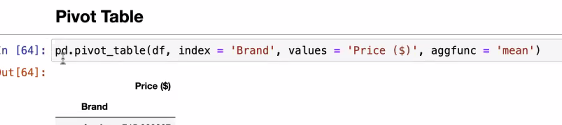

In [ ]:
df.pivot_table(index= 'Brand', values = 'Price ($)', aggfunc = 'mean')

,Price ($)
Brand,
Apple,745.666667
Asus,874.000000
Blackberry,499.000000
CAT,299.000000
Google,699.000000
Huawei,783.166667
LG,615.666667
Motorola,278.130435
Nokia,244.714286


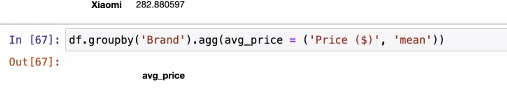

In [ ]:
df.groupby('Brand').agg(avg_price = ('Price ($)', 'mean'))

,avg_price
Brand,
Apple,745.666667
Asus,874.000000
Blackberry,499.000000
CAT,299.000000
Google,699.000000
Huawei,783.166667
LG,615.666667
Motorola,278.130435
Nokia,244.714286


In [ ]:
df.pivot_table(index = 'Brand', values = 'Price ($)', aggfunc = 'mean', columns = 'RAM ')

RAM,2,3,4,5,6,8,12,16
Brand,,,,,,,,
Apple,NaN,494.454545,838.285714,NaN,1039.000000,NaN,NaN,NaN
Asus,NaN,NaN,NaN,NaN,699.000000,932.333333,NaN,NaN
Blackberry,NaN,NaN,399.000000,NaN,549.000000,NaN,NaN,NaN
CAT,NaN,299.000000,NaN,NaN,NaN,NaN,NaN,NaN
Google,NaN,NaN,NaN,NaN,649.000000,719.000000,NaN,NaN
Huawei,NaN,NaN,264.000000,NaN,NaN,887.000000,NaN,NaN
LG,NaN,NaN,NaN,NaN,424.000000,999.000000,NaN,NaN
Motorola,99.0,184.000000,239.714286,399.0,359.000000,NaN,699.0,NaN
Nokia,134.0,142.750000,228.000000,NaN,474.000000,499.000000,NaN,NaN


**MELTING**

In [ ]:
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Battery dollar
0,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,3095,999,3.098098
1,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,5000,1199,4.170142
2,OnePlus,9 Pro,128,8,6.7,48 + 50 + 8 + 2,4500,899,5.005562
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279,17.992832
4,Google,Pixel 6,128,8,6.4,50 + 12.2,4614,799,5.774718
...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049,4.099142
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,11.919771
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099,3.354868
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429,9.382284


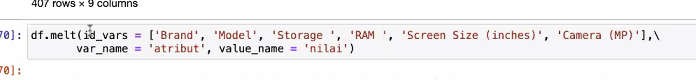

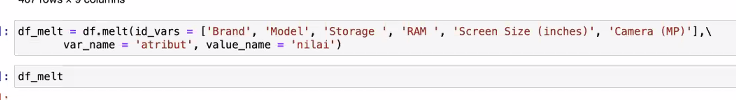

In [ ]:
df_melt = df.melt(id_vars = ['Brand' , 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)', 'Camera (MP)'],\
                  var_name = 'atribut', value_name = 'nilai')
df_melt

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),atribut,nilai
0,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,Battery Capacity (mAh),3095.000000
1,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,Battery Capacity (mAh),5000.000000
2,OnePlus,9 Pro,128,8,6.7,48 + 50 + 8 + 2,Battery Capacity (mAh),4500.000000
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,Battery Capacity (mAh),5020.000000
4,Google,Pixel 6,128,8,6.4,50 + 12.2,Battery Capacity (mAh),4614.000000
...,...,...,...,...,...,...,...,...
1216,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,Battery dollar,4.099142
1217,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,Battery dollar,11.919771
1218,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,Battery dollar,3.354868
1219,Oppo,Reno3,128,8,6.4,48+13+8+2,Battery dollar,9.382284


In [ ]:
df_melt.loc[407:408]

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),atribut,nilai
407,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,Price ($),999.0
408,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,Price ($),1199.0


**STACK**

In [ ]:
#mengurutkan untuk jenis yang sama

In [ ]:
df_stacked = df.set_index(['Brand' , 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)', 'Camera (MP)']).stack().reset_index()
df_stacked

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),level_6,0
0,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,Battery Capacity (mAh),3095.000000
1,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,Price ($),999.000000
2,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,Battery dollar,3.098098
3,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,Battery Capacity (mAh),5000.000000
4,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,Price ($),1199.000000
...,...,...,...,...,...,...,...,...
1216,Oppo,Reno3,128,8,6.4,48+13+8+2,Price ($),429.000000
1217,Oppo,Reno3,128,8,6.4,48+13+8+2,Battery dollar,9.382284
1218,Samsung,Galaxy S10 Lite,128,6,6.7,48+12+5,Battery Capacity (mAh),4500.000000
1219,Samsung,Galaxy S10 Lite,128,6,6.7,48+12+5,Price ($),649.000000


In [ ]:
df_stacked = df_stacked.rename(columns = {'level_6': 'atribut', 0 : 'nilai'})
df_stacked

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),atribut,nilai
0,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,Battery Capacity (mAh),3095.000000
1,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,Price ($),999.000000
2,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,Battery dollar,3.098098
3,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,Battery Capacity (mAh),5000.000000
4,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,Price ($),1199.000000
...,...,...,...,...,...,...,...,...
1216,Oppo,Reno3,128,8,6.4,48+13+8+2,Price ($),429.000000
1217,Oppo,Reno3,128,8,6.4,48+13+8+2,Battery dollar,9.382284
1218,Samsung,Galaxy S10 Lite,128,6,6.7,48+12+5,Battery Capacity (mAh),4500.000000
1219,Samsung,Galaxy S10 Lite,128,6,6.7,48+12+5,Price ($),649.000000


**RANKING**

In [ ]:
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Battery dollar
0,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,3095,999,3.098098
1,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,5000,1199,4.170142
2,OnePlus,9 Pro,128,8,6.7,48 + 50 + 8 + 2,4500,899,5.005562
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279,17.992832
4,Google,Pixel 6,128,8,6.4,50 + 12.2,4614,799,5.774718
...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049,4.099142
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,11.919771
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099,3.354868
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429,9.382284


In [ ]:
#peringkat HP berdasarkan harga2nya
df['ranking'] = df['Battery dollar'].rank(ascending = False , method = 'dense') #dense nilai sama jadi ranking sama
df.sort_values(by = 'ranking').head(20)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Battery dollar,ranking
109,Motorola,Moto E7i Power,32,2,6.5,13MP + 2MP,5000,99,50.505051,1.0
250,Realme,C11 2021,32,2,6.5,8MP + 2MP,5000,99,50.505051,1.0
53,Realme,Narzo 50i,32,2,6.5,50 + 2,5000,99,50.505051,1.0
216,Realme,C11 2021,32,2,6.52,8MP + 2MP,5000,99,50.505051,1.0
261,Realme,C20,32,2,6.5,8MP,5000,99,50.505051,1.0
273,Realme,C11,32,2,6.5,13MP + 2MP,5000,99,50.505051,1.0
107,Nokia,C20 Plus,32,3,6.5,8MP + 2MP,4950,99,50.000000,2.0
240,Nokia,C20 Plus,32,3,6.5,8MP + 2MP,4950,99,50.000000,2.0
139,Nokia,C20 Plus,32,3,6.5,8MP + 2MP,4950,109,45.412844,3.0
380,Xiaomi,Redmi 9C,64,3,6.53,13+2+2,5000,119,42.016807,4.0
